# Python TFM Section

## Modelling III

1. Develope and improve the most sucessful model

In [548]:
from pathlib import Path
from scipy import stats

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [549]:
df_modelize = pd.read_csv(Path.cwd() / 'Outputs' / 'DF_MODELIZE.csv', sep = ';', header = 0 , encoding = "ISO-8859-1",decimal=',')
df_modelize = df_modelize.fillna(0)

df_modelize['INTEGRAL_COSTS']  = \
df_modelize['AMONIACO'] + \
df_modelize['ATR'] + \
df_modelize['BONO_SOCIAL_PEGO'] + \
df_modelize['CALIZAS'] + \
df_modelize['CANON HID'] + \
df_modelize['CANON_CONCESION'] + \
df_modelize['CANON_HID_CATALUÃÂA'] + \
df_modelize['CANON_NC_CATALUÃÂA'] + \
df_modelize['CANON_NC_EST'] + \
df_modelize['CENTIMO_VERDE'] + \
df_modelize['COSTE_COMBUSTIBLE'] + \
df_modelize['IMPUESTO ELECT'] + \
df_modelize['LUBRICANTES'] + \
df_modelize['OTROS'] + \
df_modelize['PEAJE GEN'] +  \
df_modelize['RELIQ_CANON_NC_CATALUÃÂA'] +  \
df_modelize['SERV_GEST_RES'] + \
df_modelize['TASAS_MEDIOAMB'] + \
df_modelize['TASA_ARAGON'] 



df_modelize2 = df_modelize[['VERSION','ID_TECNOLOGIA','POWER_MWH','INTEGRAL_COSTS']]
df_modelize2['VERSION_Y'] = df_modelize2['VERSION'].astype(str).str[:-2].astype(np.int64)
df_modelize2['VERSION_M'] = df_modelize2['VERSION'].astype(str).str[4:].astype(np.int64)
df_modelize2 = df_modelize2.drop(df_modelize2[df_modelize2['INTEGRAL_COSTS'] > 0].index)

#GENERO TRES COLUMNAS PARA LAS FECHAS, 
#UNA PARA EL AÑO PARA SABER EL PERIODO EN EL QUE ESTOY, 
#OTRA QUE ES EL NUMERO DEL MES DESDE 1 A 24 PARA QUE EL MODELO SEPA LA SUCESIÓN EN QUE ORDEN VA YA QUE 201712 ESTÁ MUY LEJOS DE 201801
#LA TERCERA ES EL MES PARA QUE ENTIENDA LAS ASOCIACIONES QUE HAY ENTRE ENERO-ENERO, FEBRERO-FEBRERO

#LE APLICO UN ONEHOT PARA LAS TECNOLOGIAS


df_month = df_modelize2['VERSION'].drop_duplicates().reset_index()
df_month = df_month['VERSION'].reset_index()
df_month.rename(columns={'index':'VERSION2'}, inplace=True)
df_modelize2 = pd.merge(df_modelize2, df_month, on=['VERSION'], how='left')
df_modelize2 = df_modelize2.drop(columns=['VERSION'])
df_modelize2['VERSION2'] = df_modelize2['VERSION2'] + 1

# df_modelize2 = df_modelize2[df_modelize2['ID_TECNOLOGIA'] != 'BP']
# df_modelize2 = df_modelize2[df_modelize2['ID_TECNOLOGIA'] != 'BX']

DTECH = pd.get_dummies(pd.Series(list(df_modelize2['ID_TECNOLOGIA'])))
df_modelize2 = pd.merge(df_modelize2, DTECH, left_index=True, right_index=True)
df_modelize2 = df_modelize2.drop(columns=['ID_TECNOLOGIA'])
df_modelize2.rename(columns={'INTEGRAL_COSTS':'t0'}, inplace=True)
df_modelize2.sample(10)

C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,POWER_MWH,t0,VERSION_Y,VERSION_M,VERSION2,BP,BX,CI,EB,GN,HN,LN,NC
462,5.555716e+06,-5536275.0,2017,11,11,0,0,0,0,0,0,0,1
460,7.952508e+05,-166521.0,2017,11,11,0,0,0,0,0,1,0,0
228,-1.000674e+05,0.0,2017,6,6,1,0,0,0,0,0,0,0
259,9.593814e+06,-13010535.0,2017,7,7,0,0,0,0,0,0,0,1
277,2.889416e+06,-3919270.0,2017,7,7,0,0,1,0,0,0,0,0
508,8.561816e+06,-15202992.0,2018,1,13,0,0,1,0,0,0,0,0
334,-2.894874e+04,-2423418.0,2017,8,8,0,0,0,0,0,1,0,0
62,9.952049e+03,-1356121.0,2017,2,2,0,0,0,0,1,0,0,0
512,3.068144e+06,-5166968.0,2018,1,13,0,0,0,0,1,0,0,0
680,1.830970e+07,-11498793.0,2018,6,18,0,0,0,0,0,0,0,1


In [550]:
input_col = []
for i in range(2):
    input_col.append("t"+str(i))
    df_modelize2["t"+str(i)]=df_modelize2["t0"].shift(i)
df_modelize2=df_modelize2.dropna()
df_modelize2.head(5)

,POWER_MWH,t0,VERSION_Y,VERSION_M,VERSION2,BP,BX,CI,EB,GN,HN,LN,NC,t1
1,940091.558,-11215426.0,2017,1,1,0,0,0,0,0,0,0,1,-12774780.0
2,-1418.032,0.0,2017,1,1,0,0,0,0,0,0,0,1,-11215426.0
3,22830.702,-242300.0,2017,1,1,0,0,0,1,0,0,0,0,0.0
4,-418.593,-21771.0,2017,1,1,0,1,0,0,0,0,0,0,-242300.0
5,11909.436,-105460.0,2017,1,1,0,0,0,1,0,0,0,0,-21771.0


In [551]:
df_modelize2.columns

Index(['POWER_MWH', 't0', 'VERSION_Y', 'VERSION_M', 'VERSION2', 'BP', 'BX',
       'CI', 'EB', 'GN', 'HN', 'LN', 'NC', 't1'],
      dtype='object')

# Model Aplication

## Instances Creation

In [552]:
# Import Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_modelize2[['POWER_MWH','VERSION_Y', 'VERSION_M', 'VERSION2', 'CI', 'EB','GN', 'HN', 'LN', 'NC','t1','BP','BX']]
y = df_modelize2['t0']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)

In [553]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
colnames = X_train.columns

In [554]:
Xs_train = scaler.fit_transform(X_train.values)
Xs_train = pd.DataFrame(Xs_train)
Xs_train.columns = colnames
Xs_train.shape

(844, 13)

In [555]:
Xs_test = scaler.fit_transform(X_test.values)
Xs_test = pd.DataFrame(Xs_test)
Xs_test.columns = colnames
Xs_test.shape

(94, 13)

In [556]:
## Code for inversing the transformation once the predictor is used
# df_Unscaled = scaler.inverse_transform(df_Scaled)
# df_Unscaled = pd.DataFrame(df_Unscaled)
# df_Unscaled.columns = colnames
# df_Unscaled.head(5)

## XGBoost

In [557]:
# Load the library
import xgboost as XGB
# Create an instance
regXGB = XGB.XGBRegressor(n_estimators=100, 
                          learning_rate=0.1, 
                          gamma=0, 
                          subsample=0.7,
                          colsample_bytree=1, 
                          max_depth=6)
# Fit the data
regXGB.fit(Xs_train,y_train)
# Do predictions
y_regXGB_pred = regXGB.predict(Xs_test)

2415997303176.5903
Mean error represents  30 % from the mean value


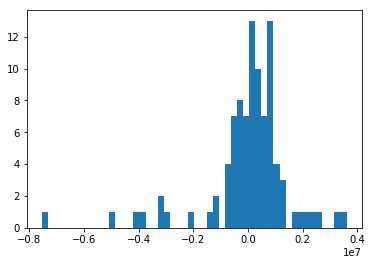

In [558]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,y_regXGB_pred))
print("Mean error represents ", round(-100*np.mean(np.abs(y_test-y_regXGB_pred))/y_test.mean()), "% from the mean value")
plt.hist(y_test-y_regXGB_pred,bins=50);

## XGBoost with GridSearchCV [Final Model]

In [559]:
# Load the library
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  7.7min finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:8

{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'nthread': 4, 'silent': 1, 'subsample': 0.7}
-5031854322956.231
2539179632504.9673
Mean error represents  32 % from the mean value


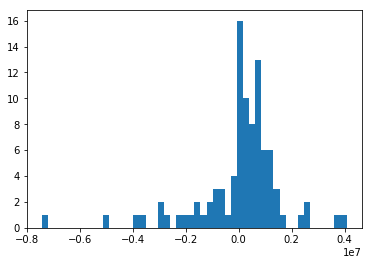

In [560]:
# Load the library
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor


# Create an instance
        
xgb1 = XGBRegressor()
parameters = {'nthread':[4], 
              'learning_rate': [0.01, 0.05, 0.11], 
              'max_depth':np.arange(3,10),
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree':[0.3,0.6,0.9,1],
              'n_estimators': [500]}

regXGBGS = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = -1,
                        scoring="neg_mean_squared_error",
                        verbose=9)

# Fit the data
regXGBGS.fit(Xs_train,y_train)


print(regXGBGS.best_params_)
print(regXGBGS.best_score_)

regXGBGS = regXGBGS.best_estimator_

# {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 500, 'nthread': 4, 'silent': 1, 'subsample': 0.7}
# -3729534491046.9116


# Do predictions
y_regXGBGS_pred = regXGBGS.predict(Xs_test)
print(mean_squared_error(y_test,y_regXGBGS_pred))
print("Mean error represents ", round(-100*np.mean(np.abs(y_test-y_regXGBGS_pred))/y_test.mean()), "% from the mean value")
plt.hist(y_test-y_regXGBGS_pred,bins=50);

## Overfitting the model

## XGBoost

In [561]:
#INTERESANTE RESULTA QUE AL QUITAR LOS VALORES TOP, LO QUE HACEMOS ES QUE MEJORA MUCHO LA DISTRIBUCIÓN DE ERRORES, PERO SE VUELVE UN POCO LOCO FALLANDO POR MÁS EN OTROS
# ES DECIR, SEGURAMETNE OVERFITTEA

In [562]:
#Despues de una iteracción, eliminamos los valores que aún nos dan ruido en el modelo y lo reentrenamos
# Ahora si, para dar por finalizado el entrenamiento del modelo con los datos de que disponemos
df_modelize2 = df_modelize2.drop(pd.DataFrame(np.abs(y_test-y_regXGB_pred)).sort_values(by=['t0'],ascending = True).head(5).index)

X = df_modelize2[['POWER_MWH','VERSION_Y', 'VERSION_M', 'VERSION2', 'CI', 'EB','GN', 'HN', 'LN', 'NC','t1','BP','BX']]
y = df_modelize2['t0']


# Create Instance
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.10 , random_state = 42)


scaler = StandardScaler()
colnames = X_train.columns

Xs_train = scaler.fit_transform(X_train.values)
Xs_train = pd.DataFrame(Xs_train)
Xs_train.columns = colnames
Xs_test = scaler.fit_transform(X_test.values)
Xs_test = pd.DataFrame(Xs_test)
Xs_test.columns = colnames

4610264367198.878
Mean error represents  33 % from the mean value


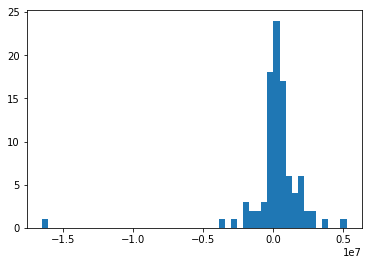

In [563]:
# Load the library
import xgboost as XGB
# Create an instance
regXGB = XGB.XGBRegressor(n_estimators=100, 
                          learning_rate=0.1, 
                          gamma=0, 
                          subsample=0.7,
                          colsample_bytree=1, 
                          max_depth=6)
# Fit the data
regXGB.fit(Xs_train,y_train)
# Do predictions
y_regXGB_pred = regXGB.predict(Xs_test)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,y_regXGB_pred))
print("Mean error represents ", round(-100*np.mean(np.abs(y_test-y_regXGB_pred))/y_test.mean()), "% from the mean value")
plt.hist(y_test-y_regXGB_pred,bins=50);

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  7.9min finished
C:\Users\ES71531200G\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:8

{'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'nthread': 4, 'silent': 1, 'subsample': 0.7}
-4361331915276.1616
4686136356637.13
Mean error represents  32 % from the mean value


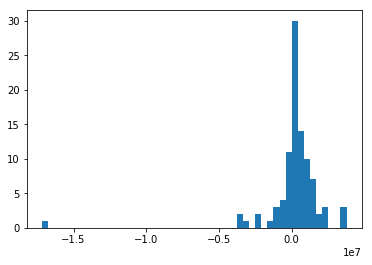